ปฏิบัติการครั้งที่ 7 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

ให้เริ่มทำปฏิบัติการจาก colab notebook หรือไฟล์ *.ipynb ที่กำหนดให้ จากนั้นบันทึกไว้เป็นไฟล์ *.pdf แล้วส่งใน Assignments

ดาวน์โหลดข้อมูลรถยนต์ชนิดต่างใน link ข้างล่างนี้  
https://donlapark.pages.dev/229351/data/elecequip.csv

In [1]:
!pip install pandas==2.2.0

In [2]:
# uploading the csv file to colab

!wget -O elecequip.csv https://donlapark.pages.dev/229351/data/elecequip.csv

--2024-01-25 04:21:03--  https://donlapark.pages.dev/229351/data/elecequip.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.44.200, 172.66.47.56, 2606:4700:310c::ac42:2cc8, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3844 (3.8K) [text/csv]
Saving to: ‘elecequip.csv’

elecequip.csv       100%[===================>]   3.75K  --.-KB/s    in 0s      

2024-01-25 04:21:03 (40.0 MB/s) - ‘elecequip.csv’ saved [3844/3844]



In [3]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
data = pd.read_csv('elecequip.csv', parse_dates=['time'],
                                        index_col='time',
                                        date_format='%Y-%m')

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


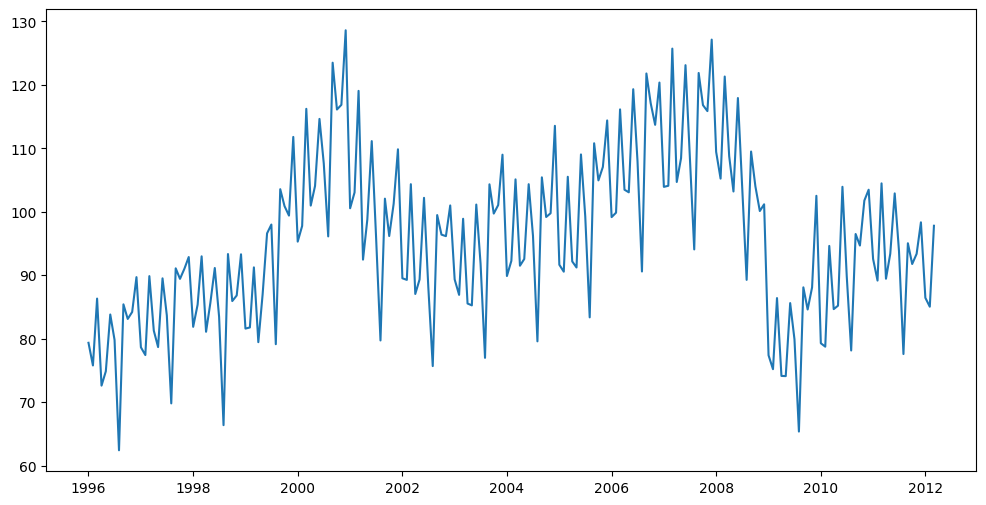

In [5]:
plt.figure(figsize=(12,6))
plt.plot(data["value"]);

In [7]:
# subsetting data at specified date
# การดึงข้อมูลออกมาเป็นบางส่วน
data.loc['1996-01-01':'2010-12-01']

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2010-08-01,176,78.14
2010-09-01,177,96.50
2010-10-01,178,94.68


In [8]:
# Add or change values
# เปลี่ยนค่าของ column value ให้มีค่าที่เราต้องการ
data.loc['2012-04-01','value'] = 86

data

,Unnamed: 0,value
time,,
1996-01-01,1.0,79.35
1996-02-01,2.0,75.78
1996-03-01,3.0,86.32
1996-04-01,4.0,72.60
1996-05-01,5.0,74.86
...,...,...
2011-12-01,192.0,98.34
2012-01-01,193.0,86.44
2012-02-01,194.0,85.04


# Moving average

In [10]:
# การคำนวณ MA เช่น คำนวณค่าเฉลี่ยทีละ 5 วัน (window=5)

# กรณีที่เป็นเลขคี่
#data['MA'] = data['value'].rolling(window=5,center=True).mean()

# กรณีที่เป็นเลขคู่

data['MA'] = data['value'].rolling(window=12,center=True).mean().rolling(window=2).mean().shift(-1)

data.head(12)

,Unnamed: 0,value,MA
time,,,
1996-01-01,1.0,79.35,NaN
1996-02-01,2.0,75.78,NaN
1996-03-01,3.0,86.32,NaN
1996-04-01,4.0,72.60,NaN
1996-05-01,5.0,74.86,NaN
1996-06-01,6.0,83.81,NaN
1996-07-01,7.0,79.80,79.750417
1996-08-01,8.0,62.41,79.789167
1996-09-01,9.0,85.41,80.005000


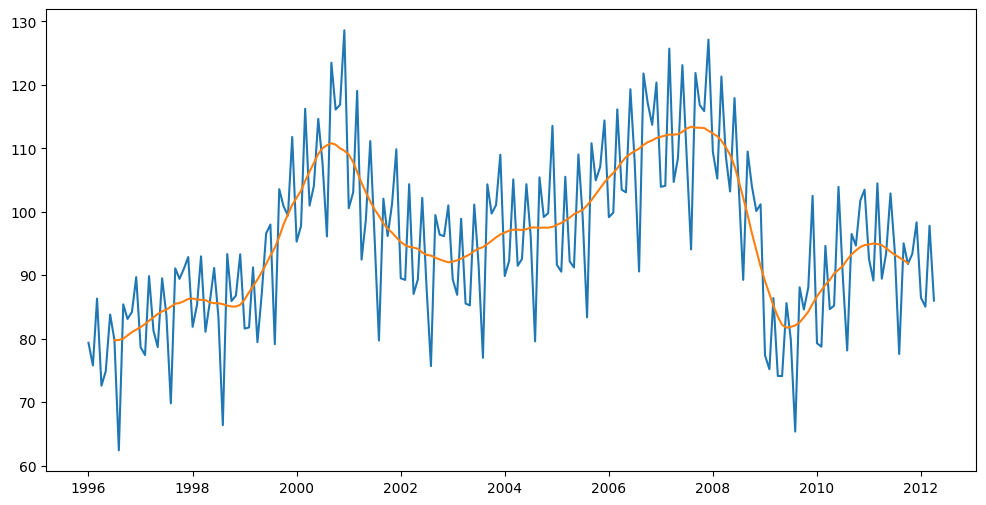

In [11]:
plt.figure(figsize=(12,6))
plt.plot(data['value'])
plt.plot(data['MA']);

# Classical decomposition

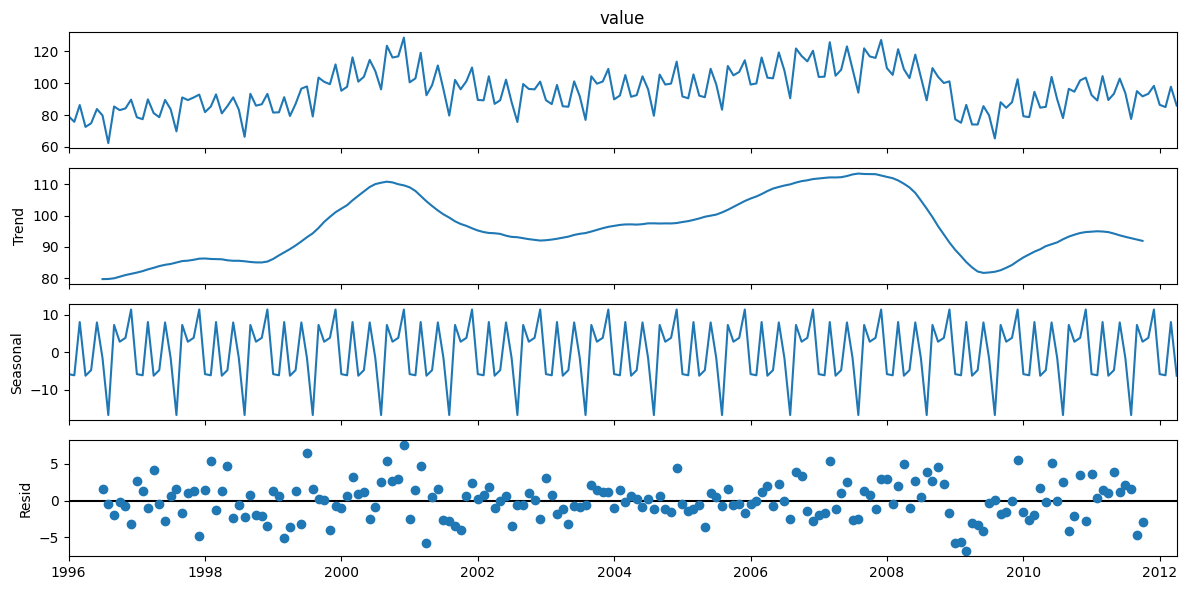

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mpl

mpl.rc("figure", figsize=(12,6))
result_add = seasonal_decompose(data['value'], model='additive')

result_add.plot();

In [13]:
data['value']

time
1996-01-01    79.35
1996-02-01    75.78
1996-03-01    86.32
1996-04-01    72.60
1996-05-01    74.86
              ...  
2011-12-01    98.34
2012-01-01    86.44
2012-02-01    85.04
2012-03-01    97.80
2012-04-01    86.00
Name: value, Length: 196, dtype: float64

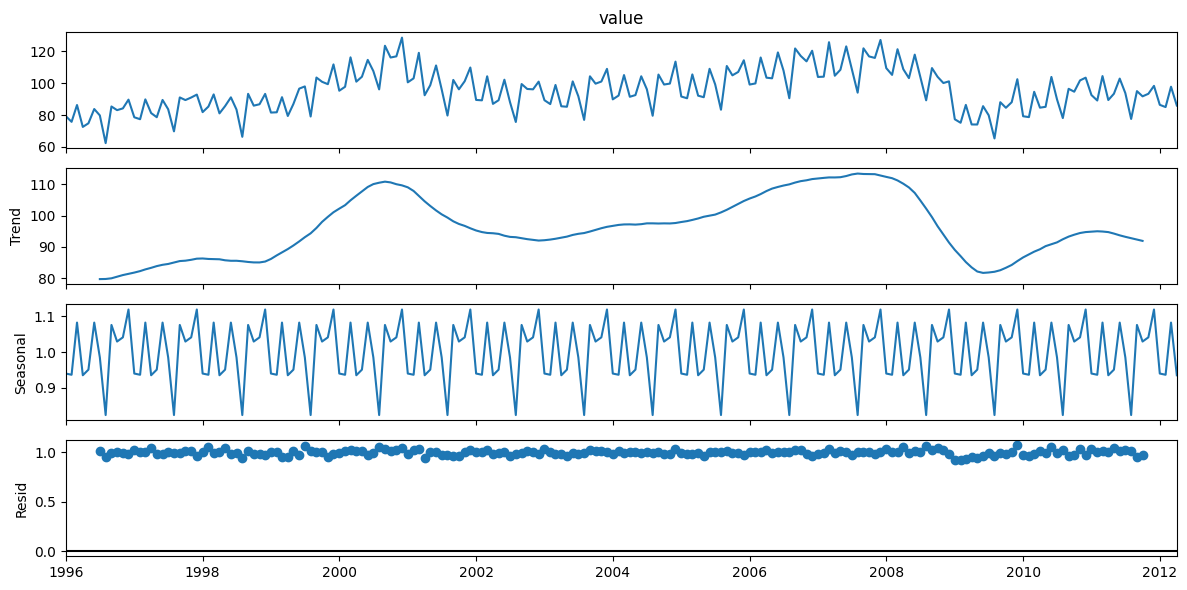

In [14]:
result_mul = seasonal_decompose(data['value'], model='multiplicative')

result_mul.plot();

### เรียกดูแต่ละส่วน

In [15]:
print(result_add.trend)
print(result_add.seasonal)
print(result_add.resid)
print(result_add.observed)

time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2011-12-01   NaN
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
2012-04-01   NaN
Name: trend, Length: 196, dtype: float64
time
1996-01-01    -5.870942
1996-02-01    -6.182553
1996-03-01     8.099891
1996-04-01    -6.298248
1996-05-01    -4.801748
                ...    
2011-12-01    11.464224
2012-01-01    -5.870942
2012-02-01    -6.182553
2012-03-01     8.099891
2012-04-01    -6.298248
Name: seasonal, Length: 196, dtype: float64
time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2011-12-01   NaN
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
2012-04-01   NaN
Name: resid, Length: 196, dtype: float64
time
1996-01-01    79.35
1996-02-01    75.78
1996-03-01    86.32
1996-04-01    72.60
1996-05-01    74.86
              ...  
2011-12-01    98.34
2012-01-01    86.44
2012-02-01    85.04
2012-03-01    97.80
2012-04-01    86

### ปฏิบัติการครั้งที่ 7
1. สร้างโมเดลเพื่อการทำนายดังนี้
1.1 แบ่งข้อมูลออกเป็น 2 ส่วน
   - training set: วันที่ 1996-01-01 ถึง 2009-12-01
   - test set: วันที่ 2010-01-01 ถึง 2012-03-01  
1.2 แยกส่วนประกอบ $y_t=S_t+T_t+R_t$ บน training set
1.3 สร้าง time series ชุดใหม่ที่แสดงถึงทำนายค่าบน test set โดยนำค่า $T_t+R_t$ ของวันล่าสุดใน training set ที่มีค่า $T_t$ มาบวกกับแต่ละค่าใน $S_t$ จากวันที่ วันที่ 2010-01-01 ถึง 2012-03-01  
3. คำนวณ RMSE โดยใช้ฟังก์ชัน `rmse` ข้างล่าง
4. แสดงแผนภาพข้อมูล elecequip และค่าทำนายที่ได้

##1. สร้างโมเดลเพื่อการทำนายดังนี้

###1.1 แบ่งข้อมูลออกเป็น 2 ส่วน
   - training set: วันที่ 1996-01-01 ถึง 2009-12-01
   - test set: วันที่ 2010-01-01 ถึง 2012-04-01  

In [16]:
training = data.loc['1996-01-01':'2009-12-01']
test = data.loc['2010-01-01':'2012-04-01']

In [17]:
training

,Unnamed: 0,value,MA
time,,,
1996-01-01,1.0,79.35,NaN
1996-02-01,2.0,75.78,NaN
1996-03-01,3.0,86.32,NaN
1996-04-01,4.0,72.60,NaN
1996-05-01,5.0,74.86,NaN
...,...,...,...
2009-08-01,164.0,65.36,82.087083
2009-09-01,165.0,88.09,82.577500
2009-10-01,166.0,84.60,83.358750


In [20]:
test

,Unnamed: 0,value,MA
time,,,
2010-01-01,169.0,79.28,86.665417
2010-02-01,170.0,78.74,87.613333
2010-03-01,171.0,94.62,88.496250
2010-04-01,172.0,84.66,89.266667
2010-05-01,173.0,85.20,90.256667
2010-06-01,174.0,103.94,90.866667
2010-07-01,175.0,89.87,91.460417
2010-08-01,176.0,78.14,92.448333
2010-09-01,177.0,96.50,93.293333


###1.2 แยกส่วนประกอบ $y_t=S_t+T_t+R_t$ บน training set

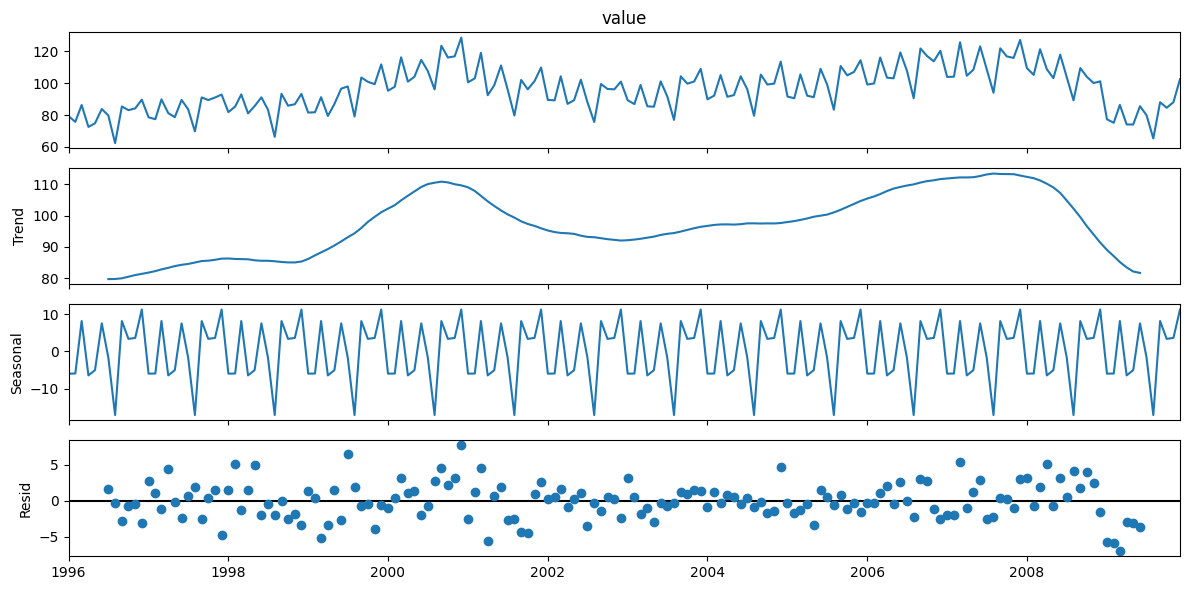

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mpl

mpl.rc("figure", figsize=(12,6))
result_add = seasonal_decompose(training['value'], model='additive')

result_add.plot();

In [30]:
print(result_add.trend)
print('________________________________________')
print(result_add.seasonal)
print('________________________________________')
print(result_add.resid)
print('________________________________________')
print(result_add.observed)

time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2009-08-01   NaN
2009-09-01   NaN
2009-10-01   NaN
2009-11-01   NaN
2009-12-01   NaN
Name: trend, Length: 168, dtype: float64
________________________________________
time
1996-01-01    -5.985857
1996-02-01    -5.957941
1996-03-01     8.183245
1996-04-01    -6.462428
1996-05-01    -5.041178
                ...    
2009-08-01   -17.138902
2009-09-01     8.178886
2009-10-01     3.378341
2009-11-01     3.644335
2009-12-01    11.289463
Name: seasonal, Length: 168, dtype: float64
________________________________________
time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2009-08-01   NaN
2009-09-01   NaN
2009-10-01   NaN
2009-11-01   NaN
2009-12-01   NaN
Name: resid, Length: 168, dtype: float64
________________________________________
time
1996-01-01     79.35
1996-02-01     75.78
1996-03-01     86.32
1996-04-01     72.60
1996-05-0

###1.3 สร้าง time series ชุดใหม่ที่แสดงถึงทำนายค่าบน test set โดยนำค่า $T_t+R_t$ ของวันล่าสุดใน training set ที่มีค่า $T_t$ มาบวกกับแต่ละค่าใน $S_t$ จากวันที่ วันที่ 2010-01-01 ถึง 2012-04-01  

In [53]:
print(result_add.trend[-10:])
print('___________________________')
print(result_add.resid[-10:])

time
2009-03-01    85.182083
2009-04-01    83.480833
2009-05-01    82.170417
2009-06-01    81.725000
2009-07-01          NaN
2009-08-01          NaN
2009-09-01          NaN
2009-10-01          NaN
2009-11-01          NaN
2009-12-01          NaN
Name: trend, dtype: float64
___________________________
time
2009-03-01   -6.965329
2009-04-01   -2.888405
2009-05-01   -3.029239
2009-06-01   -3.667989
2009-07-01         NaN
2009-08-01         NaN
2009-09-01         NaN
2009-10-01         NaN
2009-11-01         NaN
2009-12-01         NaN
Name: resid, dtype: float64


In [57]:
trend = result_add.trend['2009-06-01'] + result_add.resid['2009-06-01']
trend

78.05701121794871

In [59]:
# คำนวณค่า seasonality ของ test
mpl.rc("figure", figsize=(12,6))
test_add = seasonal_decompose(test['value'], model='additive')
test_add.seasonal

time
2010-01-01    -3.001111
2010-02-01    -6.550278
2010-03-01     8.853889
2010-04-01    -5.994028
2010-05-01    -1.572778
2010-06-01     8.491389
2010-07-01    -1.234028
2010-08-01   -15.474444
2010-09-01     2.238056
2010-10-01    -0.401111
2010-11-01     6.616389
2010-12-01     8.028056
2011-01-01    -3.001111
2011-02-01    -6.550278
2011-03-01     8.853889
2011-04-01    -5.994028
2011-05-01    -1.572778
2011-06-01     8.491389
2011-07-01    -1.234028
2011-08-01   -15.474444
2011-09-01     2.238056
2011-10-01    -0.401111
2011-11-01     6.616389
2011-12-01     8.028056
2012-01-01    -3.001111
2012-02-01    -6.550278
2012-03-01     8.853889
2012-04-01    -5.994028
Name: seasonal, dtype: float64

In [60]:
predictions = trend + test_add.seasonal
predictions

time
2010-01-01    75.055900
2010-02-01    71.506733
2010-03-01    86.910900
2010-04-01    72.062983
2010-05-01    76.484233
2010-06-01    86.548400
2010-07-01    76.822983
2010-08-01    62.582567
2010-09-01    80.295067
2010-10-01    77.655900
2010-11-01    84.673400
2010-12-01    86.085067
2011-01-01    75.055900
2011-02-01    71.506733
2011-03-01    86.910900
2011-04-01    72.062983
2011-05-01    76.484233
2011-06-01    86.548400
2011-07-01    76.822983
2011-08-01    62.582567
2011-09-01    80.295067
2011-10-01    77.655900
2011-11-01    84.673400
2011-12-01    86.085067
2012-01-01    75.055900
2012-02-01    71.506733
2012-03-01    86.910900
2012-04-01    72.062983
Name: seasonal, dtype: float64

###2. คำนวณ RMSE โดยใช้ฟังก์ชัน `rmse` ข้างล่าง

In [92]:
y_true = test['value']
y_pred = predictions

In [93]:
def rmse(y_true,y_pred):
  # Inputs
  # y_true: actual value, y_pred: predicted values
  # Output: RMSE between y_true and y_pred
  return np.sqrt(np.mean(np.square(y_true-y_pred)))
res = rmse(y_true,y_pred)
res

14.37913510313652

###3. แสดงแผนภาพข้อมูล elecequip และค่าทำนายที่ได้


In [135]:
# สร้าง time series ชุดใหม่
ts_pred = data.copy()

In [136]:
#ts_pred['value']['2010-01-01':'2012-04-01'] = result_add.trend['2009-06-01'] + result_add.resid['2009-06-01'] + seasonality first 28 months in training_set
ts_pred['value']['2010-01-01':'2012-04-01'] = result_add.trend['2009-06-01'] + result_add.resid['2009-06-01'] + result_add.seasonal['1996-01-01':'1998-04-01']
ts_pred

<ipython-input-136-1ecd7ab8221a>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  ts_pred['value']['2010-01-01':'2012-04-01'] = result_add.trend['2009-06-01'] + result_add.resid['2009-06-01'] + result_add.seasonal['1996-01-01':'1998-04-01']


,Unnamed: 0,value,MA
time,,,
1996-01-01,1.0,79.350000,NaN
1996-02-01,2.0,75.780000,NaN
1996-03-01,3.0,86.320000,NaN
1996-04-01,4.0,72.600000,NaN
1996-05-01,5.0,74.860000,NaN
...,...,...,...
2011-12-01,192.0,89.346474,NaN
2012-01-01,193.0,72.071154,NaN
2012-02-01,194.0,72.099071,NaN


<Axes: xlabel='time'>

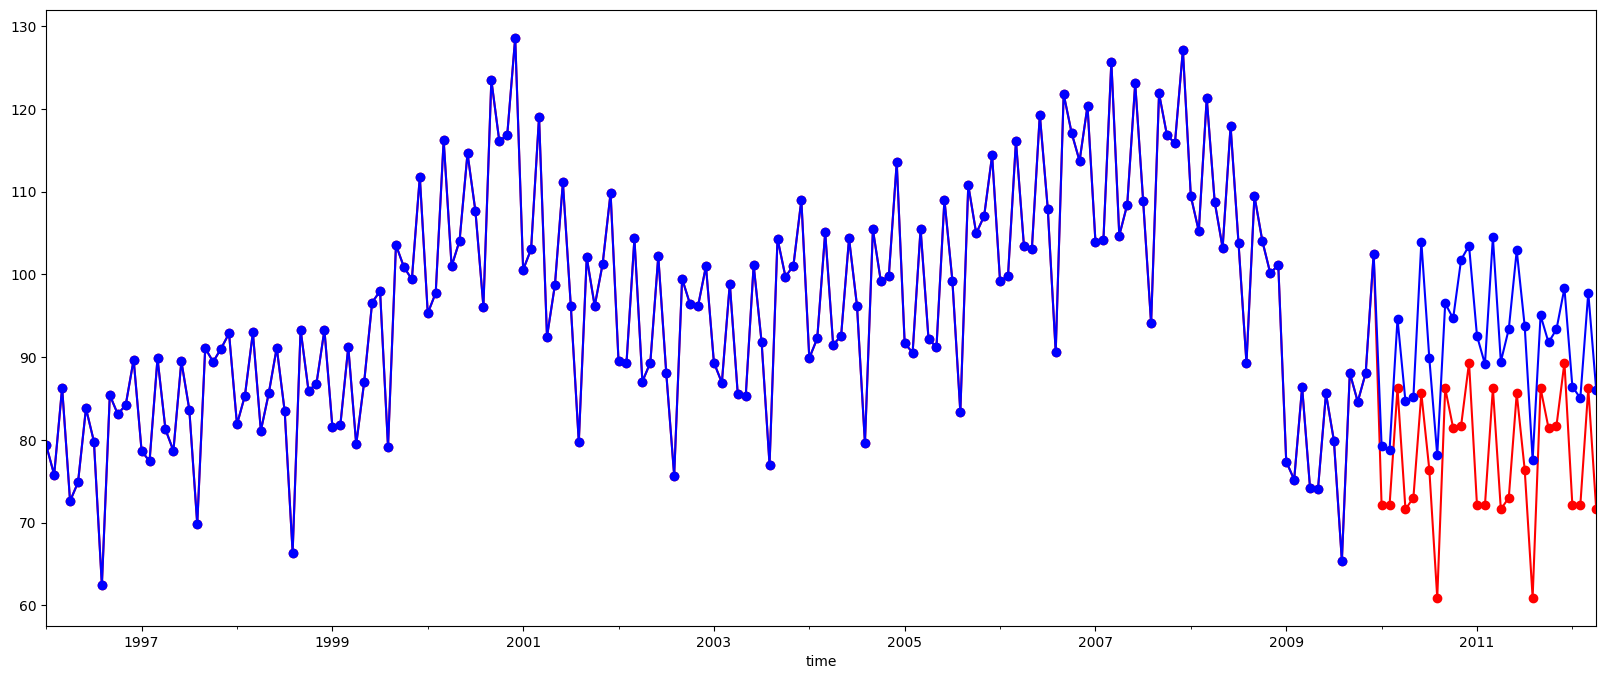

In [138]:
ts_pred['value'].plot(marker='o', color='red', figsize=(20,8))
data['value'].plot(marker='o', color='blue', figsize=(20,8))